In [1]:
# Course : BA222
  # Title  : Homework #3
  # Author : Nicole Lubaczewska
  # Date   : 12/9
  # Description: My solutions to Homework #3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sb
import numpy as np
from statsmodels.iolib.summary2 import summary_col

# PROBLEM 1

In [3]:
path = '/Users/nicolelubaczewska/Downloads/ausbeer.csv'

ab = pd.read_csv(path)

ab

,Unnamed: 0,yq,val
0,1,1956 Q1,284
1,2,1956 Q2,213
2,3,1956 Q3,227
3,4,1956 Q4,308
4,5,1957 Q1,262
...,...,...,...
63,64,1971 Q4,487
64,65,1972 Q1,419
65,66,1972 Q2,378
66,67,1972 Q3,393


In [4]:
ab.columns = ['t', 'yq', 'val']

# Extracting year

ab['year'] = ab.yq.str.split(' ').str[0].astype('int')

# Extracting quarters
ab['quarter'] = ab.yq.str.split(' ').str[1].str.replace('Q', '').astype('int')


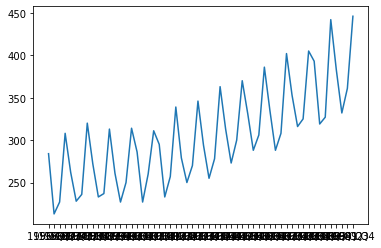

In [18]:
#1. Make a line plot of the quarterly beer production in Australia.
#What patterns do you see in the data?

plt.plot(ab2.yq, ab2.val)
plt.show()

#Patterns of repeated but growing rises and declines based on quarter periods, 
#looks like could be positive linear

  # TREND: POSITIVE TREND
# SEASONALITY: QUARTERLY SEASONALITY

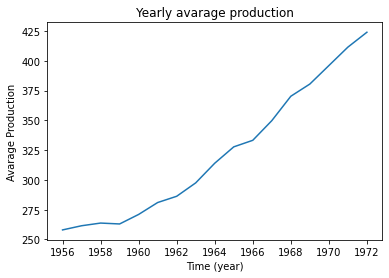

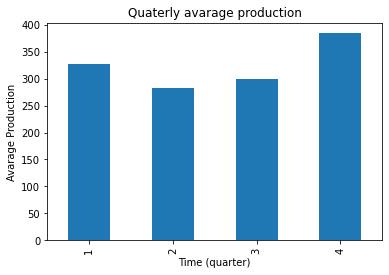

In [17]:
#2. Make a line plot of the yearly average production and a bar 
#chart of the average production by quarter. Interpret both graphs.

ab[["val", "year"]].groupby("year").mean().plot(legend = False)
plt.xlabel('Time (year)')
plt.ylabel('Avarage Production')
plt.title('Yearly avarage production')
plt.show()

ab[['val', 'quarter']].groupby('quarter').agg('mean').plot(kind = 'bar', legend = False)
plt.xlabel('Time (quarter)')
plt.ylabel('Avarage Production')
plt.title('Quaterly avarage production')
plt.show()


1st line plot shows a pattern of growing trend with significant follws during certain years. Positive linear
#or non-linear -> hard to tell

2nd bar chart shows sinfigicant spikes during the 4th quarters of each year, 
#and more volume in Q1 in comparison to Q2 or Q3. Looks like it would be decresaing if we want from Q4 to Q3.

In [16]:
#3. Estimate a linear regression model for the beer production using a time 
#trend (time as independent variable). Interpret the results for the intercept 
#and slope coefficients. Discuss the statistical significance of the beta coefficients.

reg1 = smf.ols('val ~ t', data = ab[ab.year < 1970]).fit()
reg1.params

Intercept    232.411039
t              2.515653
dtype: float64

When time is equal to 0, the avarage volume of production is 232.411039. With each additional quarter, on avarage the production increases by 2.515653 units

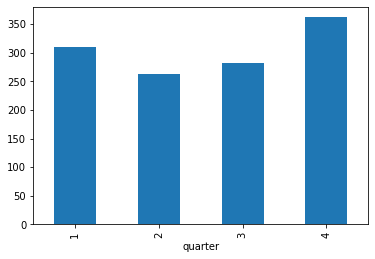

,val I,val II
Intercept,232.4110***,244.0772***
,(10.4983),(4.5967)
C(quarter)[T.2],,-49.5157***
,,(4.9856)
C(quarter)[T.3],,-33.3885***
,,(4.9892)
C(quarter)[T.4],,44.3816***
,,(4.9952)
t,2.5157***,2.4442***
,(0.3204),(0.1093)


In [19]:
# 4. Estimate a linear regression model for the beer production using a dummy 
#variable for each quarter and a linear time trend. Is there a seasonal component 
#in the Australian beer data?

ab2[['val', 'quarter']].groupby('quarter').agg('mean').plot(kind = 'bar', legend = False)
plt.show()

#deciding if we should account for the seasonal component
reg2 = smf.ols('val ~ t', data = ab2).fit()
reg3 = smf.ols('val ~ t + C(quarter)', data = ab2).fit()

summary_col([reg2, reg3],
            stars = True,
            regressor_order = ['Intercept', 'time'])

# There is a seasonal component because 
# at least one of the beta coefficients
# of the quarter variable is statistically
# different than zero.

Based on the observation, there is a seasonal component of the data -  The intercept and each quarter data are statisticaly sifnificant with the seasonal component and the adjusted r-squared is higher. We realise that accounting for the seasonal component increases our data's predictive power.

In [21]:
#5. Estimate a non-linear regression model for the beer production 
#using a dummy variable for each quarter and a quadratic time trend. 
#Then estimate the model again using a cubic time trend. Which one provides a better 
#fit, the linear, quadratic or cubic model?

reg4 = smf.ols('val ~ t + I(t ** 2) + C(quarter)', data = ab2).fit()
reg5 = smf.ols('val ~ t + I(t ** 2) + I(t ** 3) + C(quarter)', data = ab2).fit()

summary_col([reg3, reg4, reg5],
            stars = True,
            regressor_order = ['Intercept', 'time'])


,val I,val II,val III
Intercept,244.0772***,266.3920***,271.4365***
,(4.5967),(4.1159),(5.2147)
C(quarter)[T.2],-49.5157***,-49.4345***,-49.2643***
,(4.9856),(3.3136),(3.2707)
C(quarter)[T.3],-33.3885***,-33.3073***,-32.9685***
,(4.9892),(3.3160),(3.2786)
C(quarter)[T.4],44.3816***,44.3816***,44.8907***
,(4.9952),(3.3199),(3.2917)
I(t ** 2),,0.0406***,0.0868***
,,(0.0050),(0.0304)


Best fit is provided by the quadratic model since the their parameters are all stat. significant with 2 or more stars for each quarter. The stat model also has the higher R-sqared adjusted than linear model.

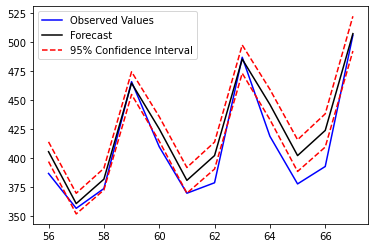

In [27]:
#6. Use the best model for predictions to predict the data for each quarter of 1970, 
#1971 and 1972. Make a graph for your predictions, including a 95 percent confidence
#interval and the actual values for the beer production. Do you think your predictions 
#are accurate?

# Extracting predictions and confidence interval
predictionTable = reg4.get_prediction(ab).summary_frame()
ab['forecast'] = predictionTable['mean']
ab['ciL'] = predictionTable['mean_ci_lower']
ab['ciU'] = predictionTable['mean_ci_upper']

ab1970 = ab[ab.year > 1969]

# Displaying results
ab1970.val.plot(color = 'blue', label = 'Observed Values')
ab1970.forecast.plot(color = 'black', label = 'Forecast')
ab1970.ciL.plot(color = 'red', linestyle = 'dashed', label = '95% Confidence Interval')
ab1970.ciU.plot(color = 'red', linestyle = 'dashed', label = '')
plt.legend()
plt.show()

# The model seems to be adequate for forecasting
# It captures both the overal time trend and the
# seasonal pattern

The predicictions for years 1970 to 1972 start at approx. time 60. It looks like they are following the general trend of the Quarters pretty strongly, however one thing that is visible is the bigger difference between the volume and forecast at t = 65, it also has a bigger change in the 95% confidence interval.

# PROBLEM 2

In [39]:
path = '/Users/nicolelubaczewska/Downloads/spotify_songs.csv'

ss = pd.read_csv(path)

ss

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


#1.Inspect the variables in the dataset using the .head() command. Create a separate data frame including 
#only the numeric variables in the data set (see the .select_dtypes() method). Also, use the .drop() 
#method to delete the track_popularity variable as this will bias your results (explain).

ss.head()

ss = ss.drop('track_popularity', axis = 1)

ss = ss.select_dtypes(np.number)

ss.describe()

It would bias our results since track_popularity was a numeric variable but it showed a number that is temporary

#2. Use the preprocessing.scale() function to standardize each variable.

from sklearn.preprocessing import scale

SS = pd.DataFrame(scale(ss))
SS.columns = ss.columns
SS.describe()

#3. Run the K-means algorithm with 4 clusters

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0).fit(SS)
kmeans


#4. Use the estimation from the K-means algorithm to predict the cluster value for each observation. 
#Use this information to compute the average value of each numeric variable per cluster. 
#Describe what makes each cluster distinct from each other.

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = SS.columns
centroids

 CLUSTER 0: LOW DANCEABILITY/ACOUSTICNESS, HIGH ENERGY/LOUDNESS/TEMPO
 
 CLUSTER 1: LOW DANCEABILITY/ VERY LOW ENERGY/ VERY LOW LOUDNESS/ LOW VALENCE, HIGH ACOUSTICNESS
 
 CLUSTER 2: LOW SPEECHINESS, ACOUSTICNESS, HIGH ENERGY, VERY HIGH INSTRUMENTALNESS, DURATION
 
 CLUSTER 3: HIGH DANCEABILITY, VALENCE and SPEECHINESS, LOW INSTRUMENTALNESS, TEMPO, 


The positive values mean that the variable is `above average`, meaning that individuals agree with the given statement more often than the rest of the data. Negative values, on the other hand, represent variables that are `below average`,  meaning that individuals disagree with the given statement more often than the rest of the data.

#IGNORE THIS
#5. For each cluster, sort the observations by how close they are to their own centroid 
#(see the euclidean_distances() function for help on calculating the distances). Using the nearest 100 songs 
#to the centroid, take a random sample of five songs and call it a playlist. Listen to a playlist from each 
#of the clusters and describe the playlist as best as you can. If you had to quickly describe each playlist 
#to a friend, how would you describe them?

from sklearn.metrics.pairwise import euclidean_distances

customerPref = SS.sample(5)
customerCentroid = pd.DataFrame(customerPref.mean()).T
customerCentroid

eucD = euclidean_distances(customerCentroid, SS)
SS['D'] = pd.DataFrame(eucD).T 


# RECOMMENDATIONS
recommendation = SS[SS.D < SS.D.quantile(0.15)].sample(5)

# VISUALIZATION
plt.figure(figsize = (8.1, 5))
plt.scatter(SS.danceability, SS.tempo, alpha = 0.25, label = 'All Songs')
plt.scatter(recommendation.danceability, recommendation['tempo'], color = 'orange', s = 50, label = 'Recommendation')
plt.scatter(customerCentroid.danceability, customerCentroid['tempo'], color = 'r', s = 100, label = 'Customer Centroid')
plt.legend()
plt.show()

#I AM NOT PARTICULARLY SURE ABOUT THIS

#Q5.

ss["cluster"] = kmeans.labels_ # ADDING CLUSTER ASSIGNMENTS TO ORIGINAL DATA
centroids = kmeans.cluster_centers_
eucD = euclidean_distances(np.array(centroids))

# ADDING THE DISTANCE TO CENTROIDS TO THE ORIGINAL DATA
ss["dist_to_0"]= pd.DataFrame(eucD[0])
ss["dist_to_1"]= pd.DataFrame(eucD[1])
ss["dist_to_2"]= pd.DataFrame(eucD[2])
ss["dist_to_3"]= pd.DataFrame(eucD[3])


playlist0 = ss[ss.cluster == 0].sort_values(by = 'dist_to_0').head(100).sample(5)[['track_name', 'track_artist']]
playlist1 = ss[ss.cluster == 1].sort_values(by = 'dist_to_1').head(100).sample(5)[['track_name', 'track_artist']]
playlist2 = ss[ss.cluster == 2].sort_values(by = 'dist_to_2').head(100).sample(5)[['track_name', 'track_artist']]
playlist3 = ss[ss.cluster == 3].sort_values(by = 'dist_to_3').head(100).sample(5)[['track_name', 'track_artist']]

# Inspecting playlist 0 (inspect all playlists)
playlist0



#6. Use the results of the clustering algorithm to write a function that given a song generates a list of 
#five similar songs selected at random.

def SimilarSong (song, eucD):
    recommendation.danceability, recommendation['tempo']
    SS[SS.D < SS.D.quantile(0.15)].sample(5)

#I'M REALLY LOST WITH THIS ONE

#sb.lmplot(x = 'Danceability', y = 'Hue', hue = 'cluster', data = SS,
#fit_reg = False)
#plt.scatter(centroids.danceability, centroids.Hue, color = 'r', s = 100)
#plt.show()

In [64]:
path = '/Users/nicolelubaczewska/Downloads/spotify_songs.csv'

sp = pd.read_csv(path)

sp

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [65]:
## Q2.1

sp.head()

# THINGS TO WATCH OUT FOR BEFORE RUNNING K-MEANS:
    # NON-NUMERICAL VARIABLES
    # CATEGORICAL VARIABLES THAT ARE NOT DUMMIES

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [66]:
# Q2.1 (continuation)

# MAKING NEW DATA FRAME WITH ONLY NUMERIC VARIABLES
spN = sp.select_dtypes(include = np.number)

# DROPPING TRACK_POPULARITY
spN = spN.drop("track_popularity", axis = 1)

# INSPECTING THE DATA ONCE MORE
spN.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [67]:
# Q2.2

# STANDARDIZING DATA
SPN = pd.DataFrame(scale(spN))
SPN.columns = spN.columns
SPN.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04,3.283300e+04
mean,7.481908e-16,6.766298e-16,-4.439387e-17,-1.387195e-16,4.288248e-15,1.461587e-16,3.415069e-16,1.124393e-14,2.267854e-16,3.626239e-16,2.482473e-17,1.314562e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-4.513616e+00,-3.860786e+00,-1.488113e+00,-1.329428e+01,-1.141322e+00,-1.056809e+00,-7.983170e-01,-3.779530e-01,-1.232390e+00,-2.189910e+00,-4.493185e+00,-3.706975e+00
25%,-6.330821e-01,-6.501633e-01,-9.343417e-01,-4.857132e-01,-1.141322e+00,-6.521210e-01,-7.295647e-01,-3.779530e-01,-6.316705e-01,-7.701772e-01,-7.776443e-01,-6.347793e-01
50%,1.182114e-01,1.237138e-01,1.731999e-01,1.852164e-01,8.761769e-01,-4.399065e-01,-4.322454e-01,-3.778812e-01,-4.093978e-01,6.172306e-03,4.099393e-02,-1.637858e-01
75%,7.316529e-01,7.815093e-01,1.003856e+00,6.941860e-01,8.761769e-01,2.460892e-01,3.627309e-01,-3.564123e-01,3.747130e-01,7.825218e-01,4.845840e-01,4.643783e-01
max,2.261810e+00,1.665940e+00,1.557627e+00,2.675185e+00,8.761769e-01,8.004256e+00,3.727493e+00,4.055060e+00,5.221943e+00,2.060710e+00,4.406866e+00,4.880413e+00


In [68]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(SPN)


In [69]:
# ADDING CLUSTER ASSIGNMENTS TO EACH OBSERVATION
SPN["cluster"] = kmeans.labels_

# PRODUCING CLUSTER CENTROIDS
SPN.groupby("cluster").mean()

# OR simply use kmeans.cluster_centroids_

# CLUSTER 0: LOW DANCEABILITY/ACOUSTICNESS, HIGH ENERGY/LOUDNESS/TEMPO
# CLUSTER 1: LOW DANCEABILITY/ VERY LOW ENERGY/ VERY LOW LOUDNESS/ LOW VALENCE, HIGH ACOUSTICNESS
# CLUSTER 2: LOW SPEECHINESS, ACOUSTICNESS, HIGH ENERGY, VERY HIGH INSTRUMENTALNESS, DURATION
# CLUSTER 3: HIGH DANCEABILITY, VALENCE and SPEECHINESS, LOW INSTRUMENTALNESS, TEMPO, 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,,,
0,-0.670638,0.561386,-0.089419,0.478097,0.100272,-0.213881,-0.464146,-0.278941,0.298483,-0.382810,0.424830,0.015524
1,-0.335094,-1.451647,-0.044446,-1.229923,0.087611,-0.184563,1.487126,0.005359,-0.208858,-0.480439,-0.291470,0.008063
2,0.041110,0.479921,-0.001033,-0.076704,-0.010101,-0.342791,-0.471806,2.908349,0.003872,-0.521044,0.160046,0.428537
3,0.662690,0.016330,0.089503,0.103419,-0.112810,0.308757,-0.110026,-0.327972,-0.160980,0.593029,-0.260636,-0.096824


In [70]:
sp["cluster"] = kmeans.labels_ # ADDING CLUSTER ASSIGNMENTS TO ORIGINAL DATA
centroids = kmeans.cluster_centers_
eucD = euclidean_distances(np.array(centroids), np.array(SPN.drop("cluster", axis = 1)))

# ADDING THE DISTANCE TO CENTROIDS TO THE ORIGINAL DATA
sp["dist_to_0"]= pd.DataFrame(eucD[0])
sp["dist_to_1"]= pd.DataFrame(eucD[1])
sp["dist_to_2"]= pd.DataFrame(eucD[2])
sp["dist_to_3"]= pd.DataFrame(eucD[3])


playlist0 = sp[sp.cluster == 0].sort_values(by = 'dist_to_0').head(100).sample(5)[['track_name', 'track_artist']]
playlist1 = sp[sp.cluster == 1].sort_values(by = 'dist_to_1').head(100).sample(5)[['track_name', 'track_artist']]
playlist2 = sp[sp.cluster == 2].sort_values(by = 'dist_to_2').head(100).sample(5)[['track_name', 'track_artist']]
playlist3 = sp[sp.cluster == 3].sort_values(by = 'dist_to_3').head(100).sample(5)[['track_name', 'track_artist']]

# Inspecting playlist 0 (inspect all playlists)
playlist0



,track_name,track_artist
31334,We Were Young,Gareth Emery
14137,Learn to Fly,Foo Fighters
13952,MakeDamnSure,Taking Back Sunday
15806,Even Angels,Radio Free Universe
4556,Surviving (feat. Joe Cleere),Sondr


In [76]:
#6

def playlist(songName):
    cluster = sp.cluster[sp.track_name == songName].iloc[0]
    distVarName = 'dist_to_' + str(cluster)
    playlist = sp[sp.cluster == cluster].sort_values(by = distVarName).head(100).sample(5)[['track_name', 'track_artist']]
    return(playlist)

playlist('FML')

,track_name,track_artist
17668,COMO UN BEBÉ,J Balvin
18613,Beautiful Mistake,Jorge Blanco
25077,Boy You Knock Me Out - Single Edit,Tatyana Ali
30770,Rewind,Louis Futon
25937,Broken Clocks,SZA
